## Gather the data

In [1]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd

import matplotlib.pyplot as plt
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [2]:
def compute_ddg(apo_dg, complex_dg):
    return complex_dg * KT_KCALMOL - apo_dg * KT_KCALMOL

def compute_error(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5 * KT_KCALMOL

In [8]:
# Retrieve free energies

replicate = 0
main_dir_og = 47
main_dir_og2 = 45
main_dir_rest = 52
sub_dirs = list(range(0, 4)) + list(range(5, 12)) + list(range(13, 17)) + list(range(18, 28))
d_mapping = {13: 2, 27: 3, 22: 4, 15: 5, 25: 6, 7: 7, 21: 8, 5: 13, 19: 14}

d_results = {}
for sub_dir in sub_dirs:
    d_results[sub_dir] = {}
    for phase in ['apo', 'complex']:
        if sub_dir in [13, 27, 22, 15, 25, 7, 21, 5, 19] and phase == "complex":
            length = 50
            main_dir = main_dir_rest
            sub_dir_og = sub_dir
            sub_dir = d_mapping[sub_dir]
        else:
            length = 10
            main_dir = main_dir_og
            sub_dir_og = sub_dir
            
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{phase}_free_energy_bootstrapped_{length}ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir_og][phase] = results

d_mapping_complex = {4: 11, 12: 1, 17: 0}
d_mapping_apo = {12: 10, 17: 9}
for sub_dir in d_mapping_complex.keys():
    d_results[sub_dir] = {}
    for phase in ['apo', 'complex']:
        if sub_dir == 12 and phase == "complex":
            length = 100
            main_dir = main_dir_rest
            sub_dir_final = d_mapping_complex[sub_dir]
        elif sub_dir == 17 and phase == "complex":
            length = 100
            main_dir = main_dir_rest
            sub_dir_final = d_mapping_complex[sub_dir]
        elif sub_dir in [12, 17] and phase == "apo":
            length = 10
            main_dir = main_dir_og2
            sub_dir_final = d_mapping_apo[sub_dir]
        else:
            length = 10
            main_dir = main_dir_og2
            sub_dir_final = d_mapping_complex[sub_dir]
        
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir_final}/replicate_{replicate}/{phase}_free_energy_bootstrapped_{length}ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results
        

In [9]:
# Format the data appropriately for cinnabar

titles = ["Y29F", "Y29A",  "W38F", "T42A", "W44F", "E76A", "E80A", "D35A", "D39A", "K27A", "R59A", "R83Q", "R87A", "H102A", "F29Y", "A29Y",  "F38W", "A42T", "F44W", "A76E", "A80E", "A35D", "A39D", "A27K", "A59R", "Q83R", "A87R", "A102H"]

to_plot = []

for sub_dir in range(28):
    ddg = compute_ddg(d_results[sub_dir]['apo']["Deltaf"][0, -1], d_results[sub_dir]['complex']["Deltaf"][0, -1])
    dddg = compute_error(d_results[sub_dir]['apo']["dDeltaf"][0, -1], d_results[sub_dir]['complex']["dDeltaf"][0, -1])
    if sub_dir in range(14):
        to_plot.append([titles[sub_dir][:-1], titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg, dddg, 0])
    else:
        to_plot.append(["-" + titles[sub_dir][:-1], "-" + titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg * -1, dddg, 0])


In [10]:
to_plot

[['Y29', 'F29', 1.2878762895789428, 0.34175065740156324, 0],
 ['Y29', 'A29', 3.0930782909916843, 0.4202690805701328, 0],
 ['W38', 'F38', 1.0516712258569911, 0.3851241514456453, 0],
 ['T42', 'A42', 0.9685602409691327, 0.14491506117450562, 0],
 ['W44', 'F44', 0.10422351806408708, 0.4320534817185354, 0],
 ['E76', 'A76', 0.4585389993059721, 0.7000412171736008, 0],
 ['E80', 'A80', 0.11603711734416366, 0.7971527695712477, 0],
 ['D35', 'A35', 1.916735921051205, 0.5499669464198873, 0],
 ['D39', 'A39', 6.913537220848905, 0.6197088861884918, 0],
 ['K27', 'A27', 4.060581469923541, 0.7395823625734228, 0],
 ['R59', 'A59', 3.8663082071279007, 0.85039200594391, 0],
 ['R83', 'Q83', 5.395459037150669, 0.7431305902817128, 0],
 ['R87', 'A87', 5.399708378476063, 0.5667967865118954, 0],
 ['H102', 'A102', 6.2967261875571126, 0.31589297147635964, 0],
 ['-F29', '-Y29', 1.0462309640888492, 0.32616165837097294, 0],
 ['-A29', '-Y29', 1.5227605530918176, 0.4952511331846339, 0],
 ['-F38', '-W38', 0.778897163153787

In [11]:
# Get the discrepancy between forward and negative reverse DDGs

for i in range(14):
    print(to_plot[i][0:2], to_plot[i][2] - to_plot[i+14][2])

['Y29', 'F29'] 0.24164532549009365
['Y29', 'A29'] 1.5703177378998667
['W38', 'F38'] 0.27277406270320337
['T42', 'A42'] 0.21290980075708887
['W44', 'F44'] 0.30116515990889325
['E76', 'A76'] -0.8530310824032767
['E80', 'A80'] 0.1444387922249324
['D35', 'A35'] 0.4735174406947269
['D39', 'A39'] 0.49317659841211636
['K27', 'A27'] -0.06832683251447946
['R59', 'A59'] -0.7148275414575949
['R83', 'Q83'] 5.235204134989953
['R87', 'A87'] 0.8666509359124888
['H102', 'A102'] -0.13033208630255544


In [12]:
# Get the discrepancy from experiment

experiment = [-0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1, -0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1]
for i in range(28):
    print(to_plot[i][0:2], to_plot[i][2] - experiment[i])
    

['Y29', 'F29'] 1.387876289578943
['Y29', 'A29'] -0.3069217090083156
['W38', 'F38'] -0.548328774143009
['T42', 'A42'] -0.8314397590308673
['W44', 'F44'] 0.10422351806408708
['E76', 'A76'] -0.9414610006940278
['E80', 'A80'] -0.38396288265583634
['D35', 'A35'] -2.583264078948795
['D39', 'A39'] -0.786462779151095
['K27', 'A27'] -1.3394185300764594
['R59', 'A59'] -1.3336917928720995
['R83', 'Q83'] -0.004540962849331365
['R87', 'A87'] -0.10029162152393667
['H102', 'A102'] 0.1967261875571129
['-F29', '-Y29'] 1.1462309640888493
['-A29', '-Y29'] -1.8772394469081823
['-F38', '-W38'] -0.8211028368462123
['-A42', '-T42'] -1.0443495597879562
['-F44', '-W44'] -0.19694164184480617
['-A76', '-E76'] -0.08842991829075109
['-A80', '-E80'] -0.5284016748807687
['-A35', '-D35'] -3.056781519643522
['-A39', '-D39'] -1.2796393775632113
['-A27', '-K27'] -1.27109169756198
['-A59', '-R59'] -0.6188642514145046
['-Q83', '-R83'] -5.239745097839284
['-A87', '-R87'] -0.9669425574364254
['-A102', '-H102'] 0.32705827385

In [13]:
# Assemble experimental values

d = {'WT': 19.0, 'A27': 13.6, 'A59': 13.8, 'Q83': 13.6, 'A87': 13.5, 
     'A35': 14.5, 'A39': 11.3, 'A76': 17.65, 'A80': 18.5, 'F29': 19.1, 
     'A29': 15.6, 'F38': 17.4, 'A42': 17.2, 'F44': 19.0, 'A102': 12.9,
     
    '-A27': -13.6, '-A59': -13.8, '-Q83': -13.6, '-A87': -13.5, 
     '-A35': -14.5, '-A39': -11.3, '-A76': -17.65, '-A80': -18.5, '-F29': -19.1, 
     '-A29': -15.6, '-F38': -17.4, '-A42': -17.2, '-F44': -19.0, '-A102': -12.9
    }

experiment = []
for k in d.keys():
    if k == 'WT':
        for wt_residue in ['K27', 'R59', 'R83', 'R87', 'H102', 
                           'D35', 'D39', 'E76', 'E80',
                           'Y29', 'W38', 'T42', 'W44']:
            experiment.append([wt_residue, d[k]*-1, 0.1]) 
            experiment.append(["-" + wt_residue, d[k], 0.1])
    else:
        experiment.append([k, d[k]*-1, 0.1]) 
        
# Note: we take the negative of everything because the free energies are subtracted differently in Schreiber et al

## Calculated vs experiment plot

In [32]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from cinnabar import plotting, stats, wrangle

In [33]:
# Write csv with data
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_input_rest.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


In [34]:
# Create map with the csv file
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_input_rest.csv')


Graph is not connected enough to compute absolute values


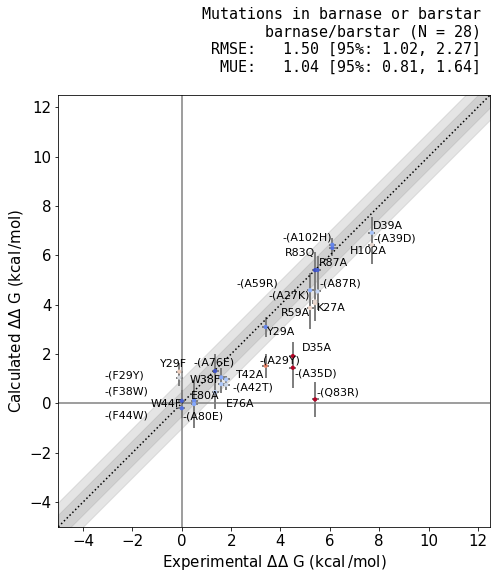

In [35]:
# Generate and save plot
plotting.plot_DDGs(fe.graph, 
                   target_name='barnase/barstar', 
                   title='Mutations in barnase or barstar', 
                   units=r'$\mathrm{kcal\,/mol}$', 
                   filename='/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_plot_rest.pdf', 
                   figsize=10, 
                   dpi=500, 
                   data_label_type='protein-mutation', 
                   xy_lim=[-5, 12.5], 
                   font_sizes={"title":15, "labels": 11, "other": 15})

# added dpi to savefig() in local version
# removed "/" in labels in local version
# Accept data_labels
# Fix order of data

## -Reverse vs Forward

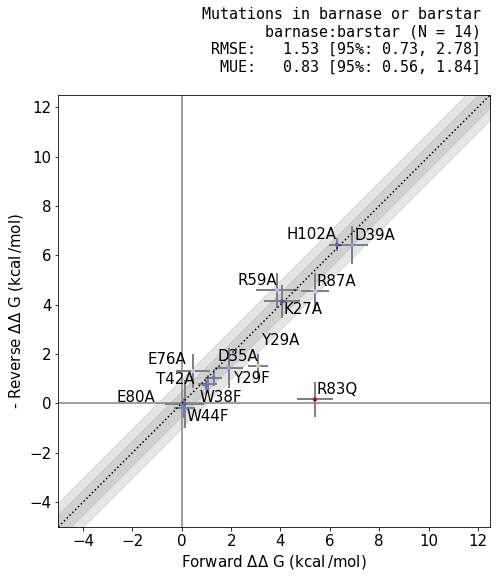

In [36]:
# Format the data appropriately
x = [entry[2] for i, entry in enumerate(to_plot) if i < 14] # forward
y = [entry[2] for i, entry in enumerate(to_plot) if i >= 14] # reverse
xerr =  [entry[3] for i, entry in enumerate(to_plot) if i < 14] # forward
yerr = [entry[3] for i, entry in enumerate(to_plot) if i >= 14] # reverse
x_data = np.asarray(x)
y_data = np.asarray(y)

# Generate the plot
filename = '/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_plot_rest_internal_consistency.pdf'
plot = plotting._master_plot(
    x_data,
    y_data,
    xerr=xerr,
    yerr=yerr,
    filename=filename,
    title="Mutations in barnase or barstar",
    target_name="barnase:barstar",
    xlabel="Forward",
    ylabel="- Reverse",
    units=r'$\mathrm{kcal\,/mol}$', 
    figsize=10, 
    dpi=500,
    xy_lim=[-5, 12.5],
    data_labels=titles[:14],
#     data_labels=[""]*14,
    font_sizes={"title":15, "labels": 15, "other": 15}
)
